#### **🛍️ Yakira Bella Sales Report: A Simple Breakdown**

Welcome to this easy-to-follow sales report for Yakira Bella, a clothing brand with stores in New York and New Jersey, plus an online shop! We’ll look at their Skirts and Dresses to uncover fun insights about pricing, top products, and who’s buying what.

>Quick Note: Product names and prices (as of April 15, 2025) are real, straight from Yakira Bella’s website. But sales numbers and customer details are made-up for this demo.

What We’ll Explore
1. Getting the Data Ready
How we load and organize the info.
2. Average Prices for Skirts and Dresses
How much these items cost on average.
3. Price Breakdown for Dresses
Comparing different types of dresses.
4. Price Breakdown for Skirts
Comparing different types of skirts.
5. Top 5 Best-Selling Items
What’s selling the most (based on our made-up data).
6. 10 Most Affordable Items
The best deals for budget shoppers.
7. 10 Most Expensive Items
The priciest pieces in the collection.
8. Sales by Store Location
How the NY Store, NJ Store, and Online shop compare.
9. Sales by Age Group
Which age groups are spending the most.

#### 🧾 **Getting the Data Ready**

We start by loading the product and sales info from an Excel file using a tool called pandas. Think of it like opening a big spreadsheet! We also use a library called tabulate to show the first few rows in a neat table, making it super easy to see what’s inside.

In [131]:
import pandas as pd
from tabulate import tabulate

# Load the Excel file
df_dataset = pd.read_excel('/Users/er/Desktop/Yakira Bella Test/project/Presentation/Final_Analyst_Project_Complete.xlsx', sheet_name='Dataset')

# Print using tabulate
#print(tabulate(df_dataset.head(), headers='keys', tablefmt='github', showindex=False))



| Name                    | Link                                                   |   Price | Category   | Sub-Category   |
|-------------------------|--------------------------------------------------------|---------|------------|----------------|
| ARIELLA SKIRT (BLACK)   | https://yakirabella.com/products/ariella-skirt-black   |      88 | Skirts     | Denim Skirts   |
| ARIYA SKIRT (CHAMBRAY)  | https://yakirabella.com/products/ariya-skirt-chambray  |      78 | Skirts     | Denim Skirts   |
| DAKOTA SKIRT (CHAMBRAY) | https://yakirabella.com/products/dakota-skirt-chambray |      78 | Skirts     | Denim Skirts   |
| JILL SKIRT (LIGHT BLUE) | https://yakirabella.com/products/jill-skirt-light-blue |      88 | Skirts     | Denim Skirts   |
| NAYELI SKIRT (BLUE)     | https://yakirabella.com/products/nayeli-skirt-blue     |      88 | Skirts     | Denim Skirts   |

Next, we load a special Sales Analysis sheet that’s all about sales numbers. It’s a simplified version of the data, perfect for digging deeper and creating charts. Again, we preview it with a clean table so it’s easy to follow.

In [132]:
import pandas as pd
from tabulate import tabulate

# Load the Excel file
df_analysis = pd.read_excel('/Users/er/Desktop/Yakira Bella Test/project/Presentation/Final_Analyst_Project_Complete.xlsx', sheet_name='Sales Analysis')

# Print using tabulate
#print(tabulate(df_analysis.head(), headers='keys', tablefmt='github', showindex=False))

#column_names = df_analysis.columns.tolist()
#print(column_names)



| Purchase Date       | Customer ID   |   Age | Gender   | Demographic   | Location   | Product Name                   | Category   | Sub-Category   |   Units Sold |   Unit Price |   Total Revenue |
|---------------------|---------------|-------|----------|---------------|------------|--------------------------------|------------|----------------|--------------|--------------|-----------------|
| 2024-04-02 00:00:00 | CUST0001      |    26 | Female   | nan           | NY Store   | ANNIE DRESS (IVORY) 37"        | Dresses    | Short Dresses  |            3 |          118 |             354 |
| 2024-01-18 00:00:00 | CUST0002      |    25 | Female   | nan           | NJ Store   | NAOMI DRESS 3/4 SLEEVES (NAVY) | Dresses    | Basic Dresses  |            3 |           98 |             294 |
| 2024-03-22 00:00:00 | CUST0003      |    34 | Female   | FL            | Online     | BRITTANY DRESS (ORANGE)        | Dresses    | Long Dresses   |            1 |          108 |             108 |
| 2024-03-06 00:00:00 | CUST0004      |    34 | Female   | AR            | Online     | DAHLIA DRESS (KHAKI) 38"       | Dresses    | Short Dresses  |            4 |           36 |             144 |
| 2024-02-23 00:00:00 | CUST0005      |    50 | Female   | AR            | Online     | TINA SKIRT 20" (NAVY)          | Skirts     | Short Skirts   |            4 |           78 |             312 |

#### 💡 **Average Unit Price by Category**

Let’s check out the average prices for Skirts and Dresses! I made a fun lollipop chart to show the difference clearly.

What We Found:
Dresses cost about $95 on average.
Skirts are around $65 on average.
Dresses are pricier, which might mean they’re seen as fancier or cost more to make. This helps Yakira Bella decide how to price their items or where to focus their marketing.

In [133]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the Sales Analysis sheet
df = pd.read_excel('/Users/er/Desktop/Yakira Bella Test/project/Presentation/Final_Analyst_Project_Complete.xlsx', sheet_name='Sales Analysis')

# Calculate the average Unit Price by Category
avg_price_by_category = df.groupby('Category')['Unit Price'].mean().reset_index()

# Create a custom lollipop chart
fig = go.Figure()

# Add the lollipop sticks (vertical lines)
for i, row in avg_price_by_category.iterrows():
    fig.add_trace(go.Scatter(
        x=[row['Category'], row['Category']],
        y=[0, row['Unit Price']],
        mode='lines',
        line=dict(color='#FF6F61', width=2),  # Coral sticks
        showlegend=False
    ))

# Add the lollipop heads (dots)
fig.add_trace(go.Scatter(
    x=avg_price_by_category['Category'],
    y=avg_price_by_category['Unit Price'],
    mode='markers',
    marker=dict(
        size=12,
        color=avg_price_by_category['Unit Price'],
        colorscale='Plasma',  # Vibrant gradient (purple to orange)
        showscale=False,
        line=dict(width=2, color='#FFFFFF')
    ),
    text=[f'${price:.2f}' for price in avg_price_by_category['Unit Price']],
    textposition='top center',
    textfont=dict(size=12, color='#2D2D2D'),
))

# Customize the layout
fig.update_layout(
    title=dict(
        text='Average Unit Price by Category (Sales Analysis)',
        font=dict(size=20, color='#2D2D2D', family='Arial, bold'),
        x=0.5,
        xanchor='center',
        yanchor='top',
        pad=dict(t=20)
    ),
    xaxis=dict(
        title='Category',
        titlefont=dict(size=14, color='#2D2D2D'),
        tickfont=dict(size=12),
        tickangle=45,
        showgrid=False
    ),
    yaxis=dict(
        title='Average Unit Price ($)',
        titlefont=dict(size=14, color='#2D2D2D'),
        tickfont=dict(size=12),
        gridcolor='#E0E0E0',
        zeroline=False
    ),
    plot_bgcolor='#F9FAFB',  # Soft off-white background
    paper_bgcolor='#F9FAFB',
    margin=dict(l=50, r=50, t=100, b=100),
    showlegend=False,
    hovermode=False
)

# Add subtle shadow effect to lollipop heads
fig.update_traces(
    marker=dict(
        opacity=0.9,
        line=dict(width=2, color='#FFFFFF')
    ),
    selector=dict(mode='markers')
)

# Show the plot
fig.show()

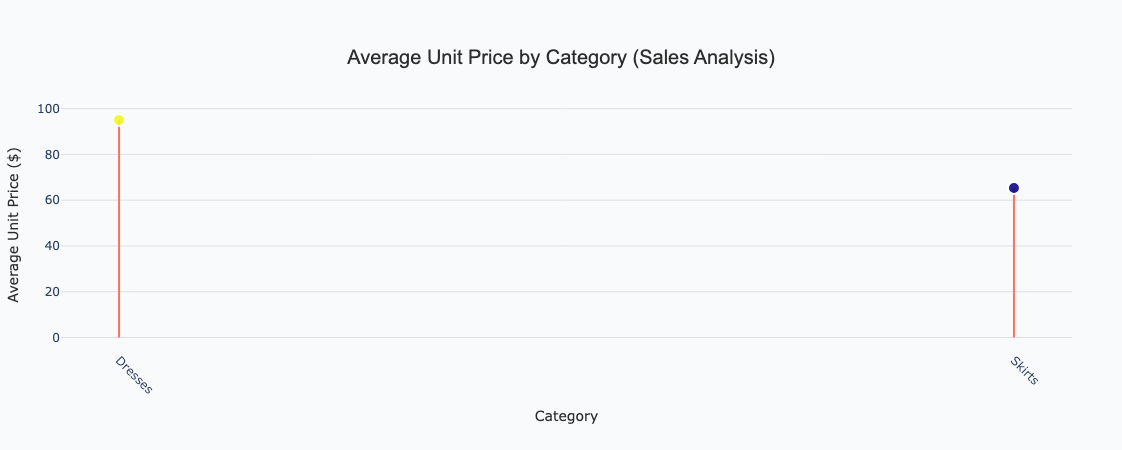

In [134]:
from IPython.display import Image, display
display(Image(filename='/Users/er/Desktop/YakiraProject/Yakira_Bella/1.png'))

#### 👗 **Average Unit Price by Sub-Category (Dresses)**

Now, let’s zoom into Dresses and see how prices differ across styles like Short Dresses or Long Dresses.

How We Did It:

- We filtered the data to only look at Dresses.
- Grouped them by style to find the average price for each.

What We Found:

- Most dress styles cost between $90–$95.
- Short Dresses and Long Dresses are a bit pricier—maybe because they use more fabric or have fancier designs.
- Standard and Basic Dresses are cheaper, perfect for everyday wear.
- This info helps Yakira Bella spot their fancy, high-end dresses and decide which ones to promote more.

In [135]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the Sales Analysis sheet
df = pd.read_excel('/Users/er/Desktop/Yakira Bella Test/project/Presentation/Final_Analyst_Project_Complete.xlsx', sheet_name='Sales Analysis')

# Filter for Category = 'Dresses'
df_dresses = df[df['Category'] == 'Dresses']

# Calculate the average Unit Price by Sub-Category for Dresses
avg_price_by_subcategory = df_dresses.groupby('Sub-Category')['Unit Price'].mean().reset_index()

# Create a bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    x=avg_price_by_subcategory['Sub-Category'],
    y=avg_price_by_subcategory['Unit Price'],
    marker=dict(
        color='#b0dbf5',  # Soft coral color for bars
        line=dict(width=1, color='#2D2D2D')  # Thin dark outline
    ),
    text=[f'${price:.2f}' for price in avg_price_by_subcategory['Unit Price']],  # Display price on bars
    textposition='auto',  # Automatically position text on top
    textfont=dict(size=12, color='#2D2D2D')
))

# Customize the layout
fig.update_layout(
    title=dict(
        text='Average Unit Price by Sub-Category for Dresses',
        font=dict(size=18, color='#2D2D2D', family='Arial, bold'),
        x=0.5,
        xanchor='center',
        yanchor='top',
        pad=dict(t=20)
    ),
    xaxis=dict(
        title='Sub-Category',
        titlefont=dict(size=14, color='#2D2D2D'),
        tickfont=dict(size=12),
        tickangle=45,
        showgrid=False
    ),
    yaxis=dict(
        title='Average Unit Price ($)',
        titlefont=dict(size=14, color='#2D2D2D'),
        tickfont=dict(size=12),
        gridcolor='#E0E0E0',
        zeroline=False
    ),
    plot_bgcolor='#FFFFFF',  # Clean white background
    paper_bgcolor='#FFFFFF',
    margin=dict(l=50, r=50, t=100, b=100),
    showlegend=False,
    hovermode='x'  # Show hover info for x-axis values
)

# Show the plot
#fig.show()

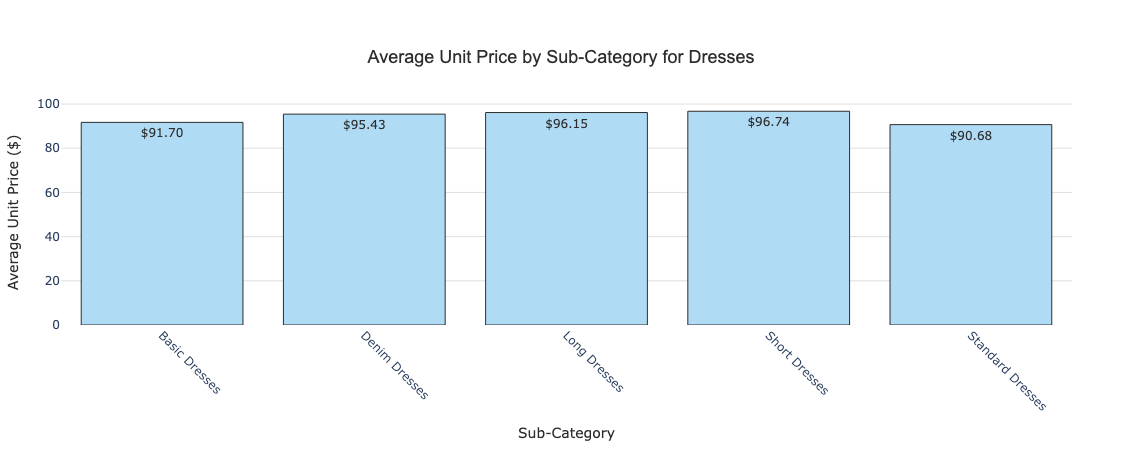

In [136]:
from IPython.display import Image, display
display(Image(filename='/Users/er/Desktop/YakiraProject/Yakira_Bella/2.png'))

#### 👗 **Average Unit Price by Sub-Category (Skirts)**

Next up, we look at Skirts to see how their prices vary by style.

How We Did It:
- We filtered the data to focus on Skirts.
- Grouped them by style to find the average price for each.
- Made a simple bar chart to show the differences.

Why It Matters:

This chart helps Yakira Bella see which skirts are budget-friendly and which feel more premium. It’s great for planning sales or deciding which styles to stock more of.

In [137]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the Sales Analysis sheet
df = pd.read_excel('/Users/er/Desktop/Yakira Bella Test/project/Presentation/Final_Analyst_Project_Complete.xlsx', sheet_name='Sales Analysis')

# Filter for Category = 'Skirts'
df_skirts = df[df['Category'] == 'Skirts']

# Calculate the average Unit Price by Sub-Category for Skirts
avg_price_by_subcategory = df_skirts.groupby('Sub-Category')['Unit Price'].mean().reset_index()

# Create a bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    x=avg_price_by_subcategory['Sub-Category'],
    y=avg_price_by_subcategory['Unit Price'],
    marker=dict(
        color='#b0dbf5',  # Soft coral color for bars
        line=dict(width=1, color='#2D2D2D')  # Thin dark outline
    ),
    text=[f'${price:.2f}' for price in avg_price_by_subcategory['Unit Price']],  # Display price on bars
    textposition='auto',  # Automatically position text on top
    textfont=dict(size=12, color='#2D2D2D')
))

# Customize the layout
fig.update_layout(
    title=dict(
        text='Average Unit Price by Sub-Category for Skirts',
        font=dict(size=18, color='#2D2D2D', family='Arial, bold'),
        x=0.5,
        xanchor='center',
        yanchor='top',
        pad=dict(t=20)
    ),
    xaxis=dict(
        title='Sub-Category',
        titlefont=dict(size=14, color='#2D2D2D'),
        tickfont=dict(size=12),
        tickangle=45,
        showgrid=False
    ),
    yaxis=dict(
        title='Average Unit Price ($)',
        titlefont=dict(size=14, color='#2D2D2D'),
        tickfont=dict(size=12),
        gridcolor='#E0E0E0',
        zeroline=False
    ),
    plot_bgcolor='#FFFFFF',  # Clean white background
    paper_bgcolor='#FFFFFF',
    margin=dict(l=50, r=50, t=100, b=100),
    showlegend=False,
    hovermode='x'  # Show hover info for x-axis values
)

# Show the plot
#fig.show()

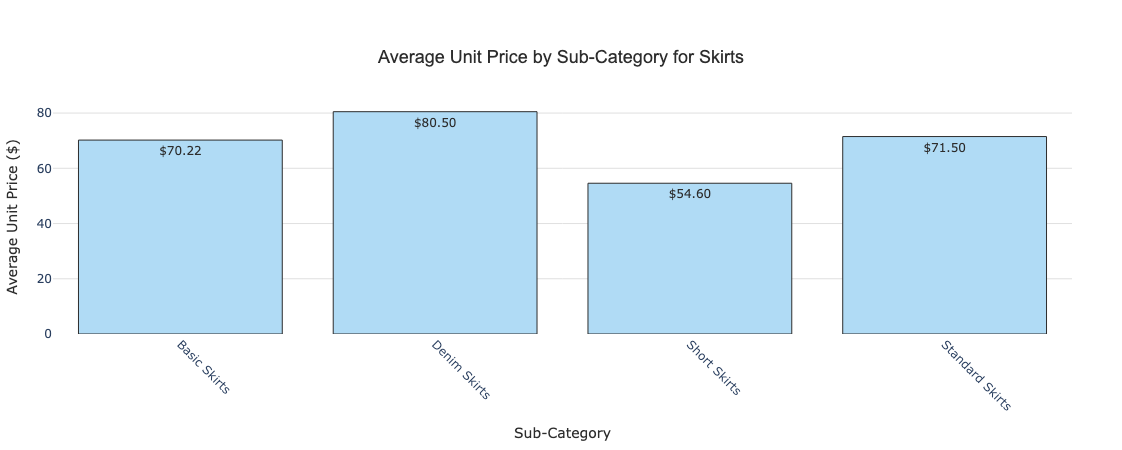

In [138]:
from IPython.display import Image, display
display(Image(filename='/Users/er/Desktop/YakiraProject/Yakira_Bella/3.png'))

#### 🏆 **Top 5 Best-Selling Products**

Let’s find out which products are flying off the shelves! (Based on our made-up sales data.)

How We Did It:
- Grouped products by name to count how many were sold.
- Picked the top 5 sellers.
- Showed them in a bar chart for a quick look.

Why It’s Useful:

These top sellers are the stars of the shop! Yakira Bella can use this to decide which items to restock, promote, or even create more of.

In [139]:
import pandas as pd
import plotly.graph_objects as go

# Load the Sales Analysis sheet
df = pd.read_excel('/Users/er/Desktop/Yakira Bella Test/project/Presentation/Final_Analyst_Project_Complete.xlsx', sheet_name='Sales Analysis')

# Group by Product Name to get total Units Sold and other details
product_sales = df.groupby('Product Name').agg({
    'Units Sold': 'sum',
    'Category': 'first',  # Take first Category for context
    'Sub-Category': 'first',  # Take first Sub-Category
    'Unit Price': 'mean'  # Average Unit Price
}).reset_index()

# Sort by Units Sold and get top 5
top_5_products = product_sales.sort_values(by='Units Sold', ascending=False).head(5)

# Print the top 5 best sellers
print("Top 5 Best-Selling Products:")
print(top_5_products[['Product Name', 'Category', 'Sub-Category', 'Units Sold', 'Unit Price']].to_string(index=False))

# Create a horizontal bar chart
fig = go.Figure()

# Add bars
fig.add_trace(go.Bar(
    x=top_5_products['Units Sold'],
    y=top_5_products['Product Name'],
    orientation='h',  # Horizontal bars
    marker=dict(
        color=top_5_products['Units Sold'],
        colorscale='bupu',  # Vibrant gradient (black to red-orange)
        showscale=False,
        line=dict(width=2, color='#FFFFFF')
    ),
    text=[f'{int(units)}' for units in top_5_products['Units Sold']],
    textposition='auto',
    textfont=dict(size=12, color='#FFFFFF')
))

# Customize layout
fig.update_layout(
    title=dict(
        text='Top 5 Best-Selling Products by Units Sold',
        font=dict(size=20, color='#2D2D2D', family='Arial, bold'),
        x=0.5,
        xanchor='center',
        yanchor='top',
        pad=dict(t=20)
    ),
    xaxis=dict(
        title='Units Sold',
        titlefont=dict(size=14, color='#2D2D2D'),
        tickfont=dict(size=12),
        gridcolor='#E0E0E0',
        zeroline=False
    ),
    yaxis=dict(
        title='Product Name',
        titlefont=dict(size=14, color='#2D2D2D'),
        tickfont=dict(size=12),
        autorange='reversed',  # Highest seller at top
        showgrid=False
    ),
    plot_bgcolor='#F9FAFB',  # Soft off-white background
    paper_bgcolor='#F9FAFB',
    margin=dict(l=150, r=50, t=100, b=50),  # Extra left margin for long product names
    showlegend=False,
    hovermode='y'
)

# Add subtle shadow effect
fig.update_traces(
    opacity=0.9,
    selector=dict(type='bar')
)

# Show the plot
#fig.show()

Top 5 Best-Selling Products:
                               Product Name Category  Sub-Category  Units Sold  Unit Price
EMILY DRESS Long Sleeve (BLACK PATTERN) 37"  Dresses Short Dresses          16        44.0
                         ZARIA DRESS (BLUE)  Dresses Short Dresses          14       128.0
            REESE DRESS LONG SLEEVE (BROWN)  Dresses Basic Dresses          13        88.0
                    JENNY DRESS 37" (BLACK)  Dresses Short Dresses          13        88.0
                     ARIYA SKIRT (CHAMBRAY)   Skirts  Denim Skirts          11        78.0


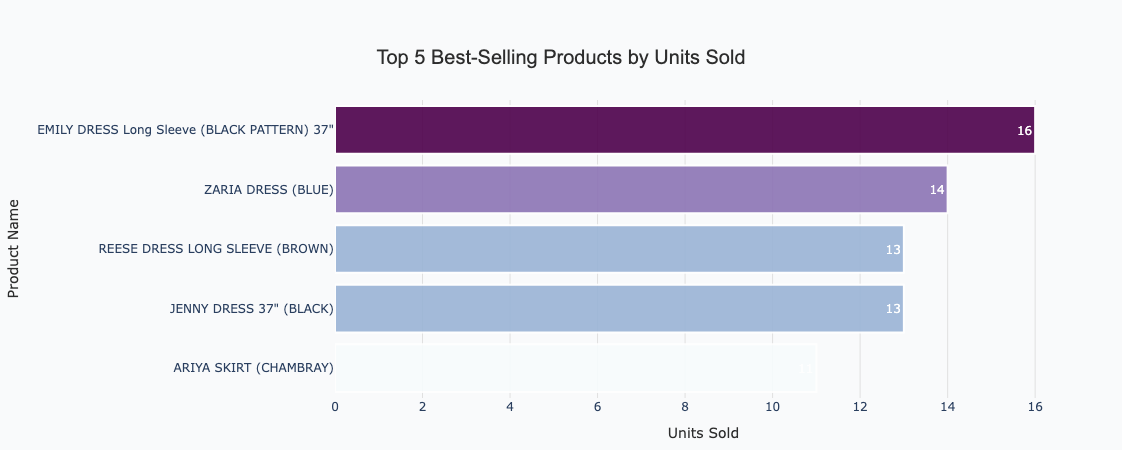

In [140]:
from IPython.display import Image, display
display(Image(filename='/Users/er/Desktop/YakiraProject/Yakira_Bella/4.png'))

#### 💰 **Top 10 Most Expensive Products**

Now, let’s look at the 10 priciest items in the collection. These are the luxury pieces!

How I Did It:
- Sorted all products by price, starting with the highest.
- Used a bright bar chart to highlight them.

Why It’s Useful:

These high-end items show what’s considered premium at Yakira Bella. They might be perfect for special promotions or bundled deals to make them even more appealing.

In [141]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the Dataset sheet
df = pd.read_excel('/Users/er/Desktop/Yakira Bella Test/project/Presentation/Final_Analyst_Project_Complete.xlsx', sheet_name='Dataset')

# Sort by Price and get top 10 most expensive products
top_10_expensive = df[['Name', 'Category', 'Sub-Category', 'Price']].sort_values(by='Price', ascending=False).head(10)

# Create a bar chart
fig = go.Figure()

# Add bars
fig.add_trace(go.Bar(
    x=top_10_expensive['Name'],
    y=top_10_expensive['Price'],
    marker=dict(
        color=top_10_expensive['Price'],
        colorscale='matter',  
        showscale=False,
        line=dict(width=2, color='#FFFFFF')
    ),
    text=[f'${price:.2f}' for price in top_10_expensive['Price']],
    textposition='auto',
    textfont=dict(size=12, color='#FFFFFF')
))

# Customize layout
fig.update_layout(
    title=dict(
        text='Top 10 Most Expensive Products (Dataset)',
        font=dict(size=20, color='#2D2D2D', family='Arial, bold'),
        x=0.5,
        xanchor='center',
        yanchor='top',
        pad=dict(t=20)
    ),
    xaxis=dict(
        title='Product Name',
        titlefont=dict(size=14, color='#2D2D2D'),
        tickfont=dict(size=12),
        tickangle=45,
        showgrid=False
    ),
    yaxis=dict(
        title='Price ($)',
        titlefont=dict(size=14, color='#2D2D2D'),
        tickfont=dict(size=12),
        gridcolor='#E0E0E0',
        zeroline=False,
        tickformat='$,.2f',  # Ensure clear price scale
        rangemode='tozero'
    ),
    plot_bgcolor='#F9FAFB',  # Soft off-white background
    paper_bgcolor='#F9FAFB',
    margin=dict(l=50, r=50, t=100, b=100),
    showlegend=False,
    hovermode='x'
)

# Add subtle shadow effect
fig.update_traces(
    opacity=0.9,
    selector=dict(type='bar')
)

# Show the plot
#fig.show()

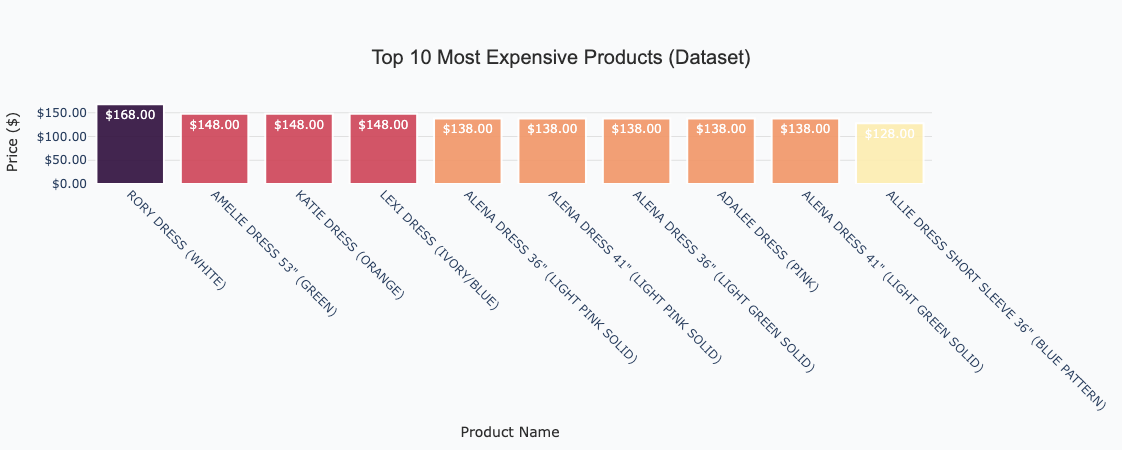

In [142]:
from IPython.display import Image, display
display(Image(filename='/Users/er/Desktop/YakiraProject/Yakira_Bella/5.png'))

#### 🧵 **Top 10 Most Affordable Products**

Here are the 10 most affordable pieces in the collection—perfect for shoppers on a budget!

How We Did It:
- Sorted all products by price, starting with the lowest.
- Made a colorful bar chart to show them off.

Why It Matters:

These affordable pieces can attract more customers and might be a great chance to suggest add-ons, like pairing a cheap skirt with a fancier top.

In [143]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the Dataset sheet
df = pd.read_excel('/Users/er/Desktop/Yakira Bella Test/project/Presentation/Final_Analyst_Project_Complete.xlsx', sheet_name='Dataset')

# Sort by Price and get top 10 cheapest products
top_10_cheapest = df[['Name', 'Category', 'Sub-Category', 'Price']].sort_values(by='Price', ascending=False).tail(10)

# Create a bar chart
fig = go.Figure()

# Add bars
fig.add_trace(go.Bar(
    x=top_10_cheapest['Name'],
    y=top_10_cheapest['Price'],
    marker=dict(
        color=top_10_cheapest['Price'],
        colorscale='turbo',  
        showscale=False,
        line=dict(width=2, color='#FFFFFF')
    ),
    text=[f'${price:.2f}' for price in top_10_cheapest['Price']],
    textposition='auto',
    textfont=dict(size=12, color='#FFFFFF')
))

# Customize layout
fig.update_layout(
    title=dict(
        text='Top 10 Most Affordable Products (Dataset)',
        font=dict(size=20, color='#2D2D2D', family='Arial, bold'),
        x=0.5,
        xanchor='center',
        yanchor='top',
        pad=dict(t=20)
    ),
    xaxis=dict(
        title='Product Name',
        titlefont=dict(size=14, color='#2D2D2D'),
        tickfont=dict(size=12),
        tickangle=45,
        showgrid=False
    ),
    yaxis=dict(
        title='Price ($)',
        titlefont=dict(size=14, color='#2D2D2D'),
        tickfont=dict(size=12),
        gridcolor='#E0E0E0',
        zeroline=False,
        tickformat='$,.2f',  # Clear price scale
        rangemode='tozero'
    ),
    plot_bgcolor='#F9FAFB',  # Soft off-white background
    paper_bgcolor='#F9FAFB',
    margin=dict(l=50, r=50, t=100, b=100),
    showlegend=False,
    hovermode='x'
)

# Add subtle shadow effect
fig.update_traces(
    opacity=0.9,
    selector=dict(type='bar')
)

# Show the plot
#fig.show()

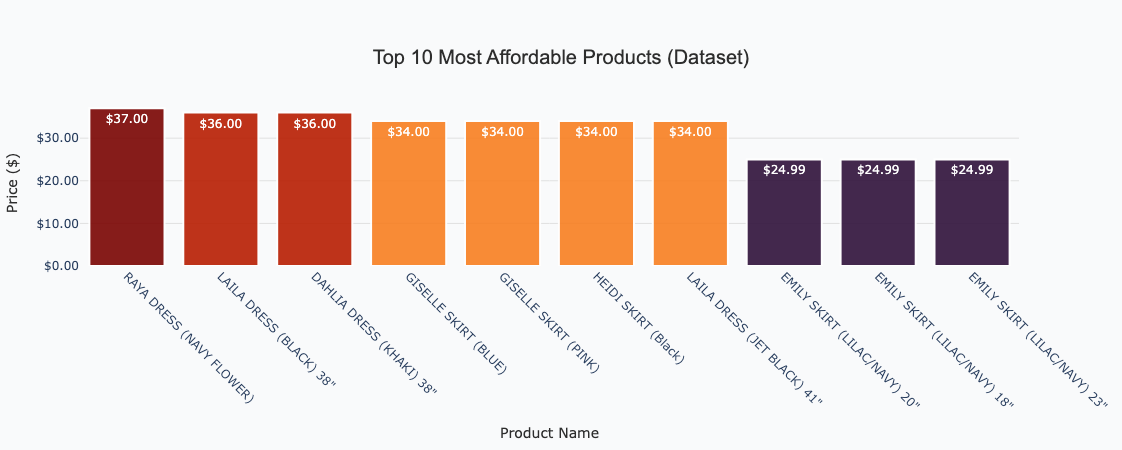

In [144]:
from IPython.display import Image, display
display(Image(filename='/Users/er/Desktop/YakiraProject/Yakira_Bella/6.png'))

#### 🏬 **Total Sales by Store**

Let’s see how much money each store location is making: the NY Store, NJ Store, and Online shop.

How We Did It:
- Added up the total sales for each location.
- Made a bar chart with bright colors to compare them.

What We Found:
- Online is the winner with $47,978.76 in sales!
- NY Store made $10,839.98.
- NJ Store made $5,102.95.

The Online shop is doing amazing, making way more than the physical stores. This might mean more people prefer shopping online, or the website is easier to use.

In [145]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the Sales Analysis sheet
df = pd.read_excel('/Users/er/Desktop/Yakira Bella Test/project/Presentation/Final_Analyst_Project_Complete.xlsx', sheet_name='Sales Analysis')

# Group by Location and calculate total sales (Total Revenue)
total_sales_by_location = df.groupby('Location')['Total Revenue'].sum().reset_index()

# Print total sales per store
print("Total Sales by Store:")
print(total_sales_by_location.to_string(index=False))

# Create a bar chart
fig = go.Figure()

# Add bars
fig.add_trace(go.Bar(
    x=total_sales_by_location['Location'],
    y=total_sales_by_location['Total Revenue'],
    marker=dict(
        color=total_sales_by_location['Total Revenue'],
        colorscale='rainbow',  # Vibrant purple-to-orange gradient
        showscale=False,
        line=dict(width=2, color='#FFFFFF')
    ),
    text=[f'${revenue:,.2f}' for revenue in total_sales_by_location['Total Revenue']],
    textposition='auto',
    textfont=dict(size=12, color='#FFFFFF')
))

# Customize layout
fig.update_layout(
    title=dict(
        text='Total Sales by Store (NY Store, NJ Store, Online)',
        font=dict(size=20, color='#2D2D2D', family='Arial, bold'),
        x=0.5,
        xanchor='center',
        yanchor='top',
        pad=dict(t=20)
    ),
    xaxis=dict(
        title='Store Location',
        titlefont=dict(size=14, color='#2D2D2D'),
        tickfont=dict(size=12),
        showgrid=False
    ),
    yaxis=dict(
        title='Total Sales ($)',
        titlefont=dict(size=14, color='#2D2D2D'),
        tickfont=dict(size=12),
        gridcolor='#E0E0E0',
        zeroline=False,
        tickformat='$,.0f'  # Clear sales scale with commas
    ),
    plot_bgcolor='#F9FAFB',  # Soft off-white background
    paper_bgcolor='#F9FAFB',
    margin=dict(l=50, r=50, t=100, b=50),
    showlegend=False,
    hovermode='x'
)

# Add subtle shadow effect
fig.update_traces(
    opacity=0.9,
    selector=dict(type='bar')
)

# Show the plot
#fig.show()

Total Sales by Store:
Location  Total Revenue
NJ Store        5102.95
NY Store       10839.98
  Online       47978.76


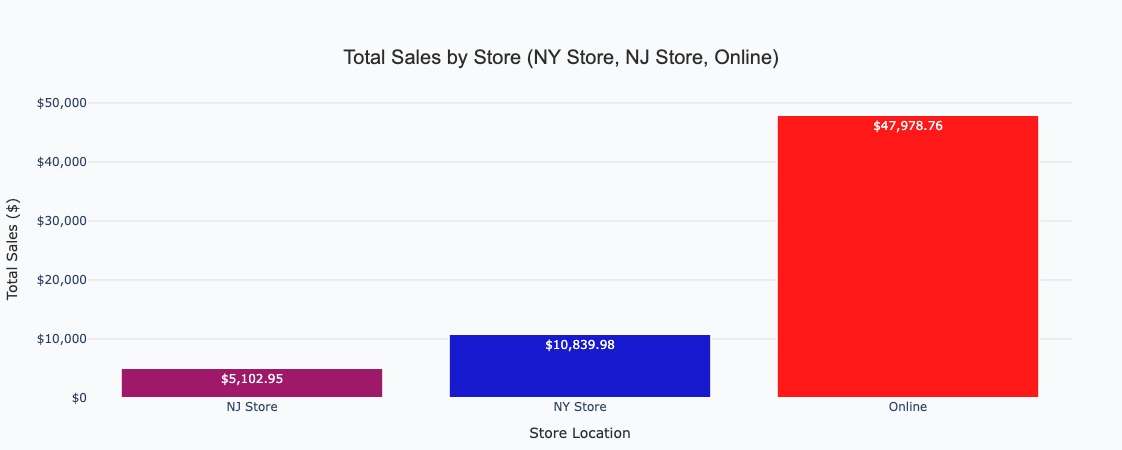

In [146]:
from IPython.display import Image, display
display(Image(filename='/Users/er/Desktop/YakiraProject/Yakira_Bella/7.png'))

#### 👥 **Sales by Age Group**

Who’s buying the most? Let’s break it down by age group to find out!

How I Did It:

- Split customers into age groups like 18–25, 26–35, and so on.
- Added up the total sales for each group.
- Showed the results in a color-coded bar chart.

What We Found:
- 26–35 and 46–55 age groups are the biggest spenders, with $17,876 and $17,908.
- 18–25 spent $12,315, and 36–45 spent $11,727.
- 56+ spent the least at $4,096.

Why It Matters:

- Yakira Bella can now focus on the 26–35 and 46–55 groups with special ads or products they’ll love, since they’re spending the most.

In [147]:
import pandas as pd
import plotly.graph_objects as go

# Load the second sheet
df = pd.read_excel('/Users/er/Desktop/Yakira Bella Test/project/Presentation/Final_Analyst_Project_Complete.xlsx', sheet_name=1)

# Define age groups
bins = [18, 25, 35, 45, 55, float('inf')]
labels = ['18-25', '26-35', '36-45', '46-55', '56+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

# Calculate total revenue by age group
revenue_by_age_group = df.groupby('Age Group')['Total Revenue'].sum().reset_index()

# Create a bar chart
fig = go.Figure()

# Add bars
fig.add_trace(go.Bar(
    x=revenue_by_age_group['Age Group'],
    y=revenue_by_age_group['Total Revenue'],
    marker=dict(
        color=revenue_by_age_group['Total Revenue'],
        colorscale='Tealgrn',  # Teal-to-green gradient
        showscale=False,
        line=dict(width=2, color='#FFFFFF')
    ),
    text=[f'${revenue:,.0f}' for revenue in revenue_by_age_group['Total Revenue']],
    textposition='auto',
    textfont=dict(size=12, color='#2D2D2D')
))

# Customize the layout
fig.update_layout(
    title=dict(
        text='Total Revenue by Age Group',
        font=dict(size=20, color='#2D2D2D', family='Arial, bold'),
        x=0.5,
        xanchor='center',
        yanchor='top',
        pad=dict(t=20)
    ),
    xaxis=dict(
        title='Age Group',
        titlefont=dict(size=14, color='#2D2D2D'),
        tickfont=dict(size=12),
        showgrid=False
    ),
    yaxis=dict(
        title='Total Revenue ($)',
        titlefont=dict(size=14, color='#2D2D2D'),
        tickfont=dict(size=12),
        gridcolor='#E0E0E0',
        zeroline=False,
        tickformat='$,.0f'
    ),
    plot_bgcolor='#F9FAFB',  # Soft off-white background
    paper_bgcolor='#F9FAFB',
    margin=dict(l=50, r=50, t=100, b=50),
    showlegend=False,
    hovermode='x'
)

# Add hover effect
fig.update_traces(
    opacity=0.9,
    hovertemplate='<b>Age Group</b>: %{x}<br><b>Revenue</b>: $%{y:,.0f}<extra></extra>'
)

# Show the plot
#fig.show()

/var/folders/tw/50trf8dj1vq6gfxndtg7gw800000gn/T/ipykernel_2342/1248992432.py:13: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



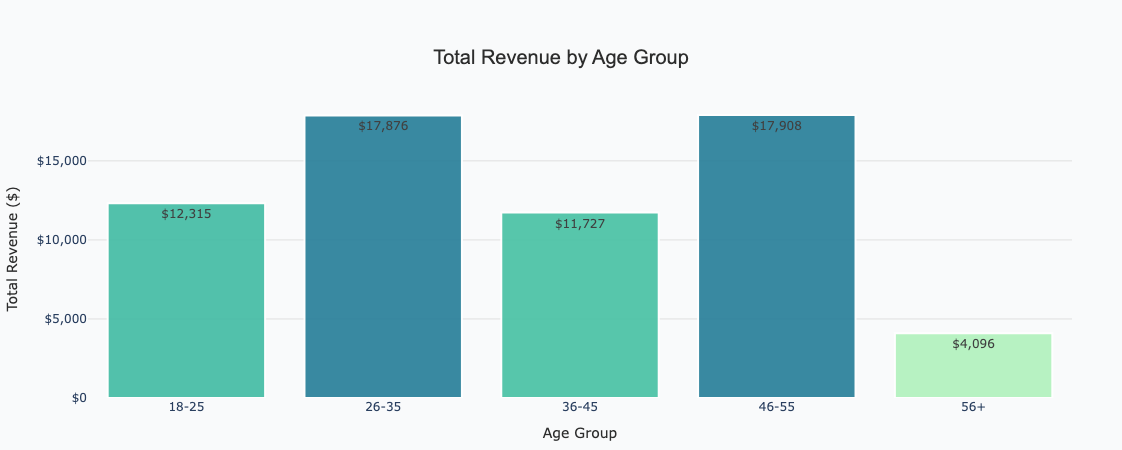

In [148]:
from IPython.display import Image, display
display(Image(filename='/Users/er/Desktop/YakiraProject/Yakira_Bella/8.png'))